# Homework 2: Support Vector Machines

## Predefined kernels

----------------------------------------------------
Machine Learning                      

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es* and *Emilio Parrado Hernández emipar@tsc.uc3m.es*

----------------------------------------------------

Student: **María González García**

----------------------------------------------------

The aim of this HW is to analyse the performance of SVMs with different configurations (different kernels and parameters), learn to desing own (problem/expertise guided) kernel functions, as well as study different approaches to combine the SMV training with a feature selection stage.

To carry out this task, we are going to work with [Arrhythmia dataset](http://archive.ics.uci.edu/ml/datasets/Arrhythmia) from the UCI repository. Let's start loading and preparing the data and, next, you will have to complete the proposed exercises.

## Load and prepare the data


The orginal aim of this problem is to detect the presence and absence of cardiac arrhythmia and to classify it in one of the 16 groups. Class 01 refers to 'normal', whereas ECG classes 02 to 15 refers to different classes of arrhythmia and class 16 refers to the rest of unclassified ones. For this purpose, this database contains $279$ samples with $206$ features with information about patient information (age, sex, height, weight) and cardiac characteristics, such as, the heart rate and parameters of several ECG channels. For the purpose of this notebook, let's convert this dataset to binary problem (arrhythmia/normal).

Next cell code includes the code to:
* Load the dataset.
* Data preparation: fill missing values and convert from multiclass to binary problem.
* Create training and testing partitions with the 80% and 20% of the original data
* Normalize the data to zero mean and unitary standard deviation

In [1]:
import pandas as pd
import numpy as np
#data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data", header= None)
data = pd.read_csv("arrhythmia.data", header= None)

data = data.replace('?', np.nan).astype(float)
data.fillna(data.mean(),inplace=True)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


In [2]:
X = data[data.columns[:-1]].values
Y = np.where(data[data.columns[-1]].values>1,0,1)  # Convert to binary classification: 0 normal, 1 arrhythmia

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create data partitions
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=1)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
print(X_test.shape)
print(Y_test.shape)

(91, 279)
(91,)


# Exercise 1. Analysis of SVM performance (1 point)

The goal of this first exercise is to compare the performance of a linear SVM vs. a non-linear SVM with a RBF kernel. For this purpose, you have to complete the following sections.

Note: Do not forget to cross validate their free parameters.


### Exercise 1.1. Linear SVM
Train and evalute the test performance of a linear SVM

### Solution

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.logspace(-3, 3, 10)}
model = SVC(kernel='linear')
clf = GridSearchCV(model, parameters)
clf.fit(X_train, Y_train)
print("Best C:", clf.best_params_['C'])

Best C: 0.004641588833612777


In [6]:
model = SVC(kernel='linear',C=clf.best_params_['C'])
model.fit(X_train, Y_train)
print("Accuracy in a Linear SVM",model.score(X_test,Y_test))

Accuracy in a Linear SVM 0.8131868131868132


### Exercise 1.2. Non-linear SVM
Train and evalute the test performance of a SVM with a RBF kernel

In [7]:
num_features=np.shape(X_train)[1]
gamma_values = [val/num_features for val in [0.125, 0.25, 0.5, 1, 2, 4, 8]]

parameters = {'gamma':gamma_values, 'C':np.logspace(-3, 3, 10)}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, Y_train)
print("Best gamma:", clf.best_params_['gamma'])
print("Best C:", clf.best_params_['C'])

Best gamma: 0.00044802867383512545
Best C: 10.0


In [8]:
model = SVC(kernel='rbf',C=clf.best_params_['C'],gamma=clf.best_params_['gamma'])
model.fit(X_train, Y_train)
print("Accuracy in a non-linear SVM",model.score(X_test,Y_test))

Accuracy in a non-linear SVM 0.8021978021978022


### Exercise 2.3. Analysis of the results

Compare both results (analysing the optimal parameters used by each model) and provide your comments/conclusions.

**Answer:**

As the results show, the best performing model for this data set is a linear SVM with an accuracy of 81% on the test set. One reason for this result is the fact that there are input variables that are linear and others that are nonlinear and the Gaussian kernel, which is nonlinear, cannot classify well.

With a GridSearch function we obtain that the best value of C for a linear SVM is 0.0046 and for a nonlinear SVM is 10. The value of C is a hyperparameter that controls the accuracy and complexity of the model. When this value is high the model tends to reduce the misclassified samples making a complex model and could tend to overfit. What we can see is that the nonlinear SVM has tried to be more accurate which has made it generalize worse than a simpler model such as the linear SVM.

# Exercise 2. Design of specific kernels

To improve the performance of the above models, we have examined the data set in detail and we have realized that there are two types or subsets of variables:
1. Demographics and general ECG parameters (including the heart rate): features #0-#14
2. Channel parameters (width, amplitude, ...): features #15-#278

We have talked about this with an expert. As result, he has indicated us that the demographics and general ECG parameters are quite important and that the model should give them as much importance as the channel parameters. And, in addition, he has pointed out that there are non-linear relationships within these feature groups that should be exploited by the model to obtain performance gains.

To take this information into account, we have thought of designing a specific kernel that, firstly, combines the variables of each group non-linearly and, later, it combines both groups linearly. In other words, exploiting the fact that a linear combination of kernels is a kernel,  we can construct a framework to linearly
combine RBF kernels with different values of $\gamma$, one for the demographics and general ECG features and another for the channel parameters. Therefore, we propose to use the following kernel:

$$ K(\bf{x}, \bf{x'}) = \lambda K_{S_1}(\bf{x}_{S_1}, \bf{x}_{S_1}') + (1-\lambda) K_{S_2}(\bf{x}_{S_2}, \bf{x}_{S_2}') $$

where
- $K_{S_1}$ is the kernel that acts in the first group of features (demographics and general ECG).
- $K_{S_2}$ is the kernel that acts in the second group (channel parameters).
- $\bf{x}_{S_1}$ is subset of data using only the features of group 1  (demographics and general ECG parameters).
- $\bf{x}_{S_2}$ is subset of data using only the features of group 2  (channel parameters).
- $0< \lambda <1$ is a combination parameter. The extreme values $\lambda =0$ and $\lambda =1$ mean only one of the two sources of information is considered.






## Exercise 2.1 (2.5 points)

Analyse the resulting model performance when we train a SVM with this predefined kernel for $\lambda = [0, 0.1, 0.2, ..., 1]$. Besides, analyse the impact of considering $K_{S_1}$ and $K_{S_2}$ being either linear of RBF kernels. In case you are using RBF kernel, to avoid selecting the optimum value of either $\gamma_1$ or $\gamma_2$, you can set their values to $1/\#S_1$ and $1/\#S_2$ (being $\#S_i$ the number of elements in the subset  $S_i$). Anyway, I advise you to cross validate the value of $C$.

HINT: To complete this exercise, you can set the parameter `kernel` of the SVC class to `precomputed` so that you can use precomputed kernels. To precompute the kernel, you can use the functions: [`sklearn.metrics.pairwise.linear_kernel`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.linear_kernel.html#sklearn.metrics.pairwise.linear_kernel) and [`sklearn.metrics.pairwise.rbf_kernel`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel). Please, take care of precalculating the training and test kernel matrixes and use them correctly.

Finally, analyse the results:
* Do we get advantage of the RBF based combination kernel versus the linear one?
* Why do you think the RBF kernel can now exploit no linear relationships?
* Does the solution depend on $\lambda$?
* How can you really exploit the full potential of this approach?

In [9]:
X_train_1 = X_train[:, 0:15]
X_test_1 = X_test[:, 0:15]

X_train_2 = X_train[:, 15:279]
X_test_2 = X_test[:, 15:279]

In [10]:
import sklearn.metrics.pairwise as klin
import sklearn.metrics.pairwise as krbf
lamda=np.arange(0,1.1,0.1)
accuracy=[]
accuracy_rbf=[]
for i in lamda:

  #Linear kernel

  ktr1=klin.linear_kernel(X_train_1,X_train_1)
  ktr2=klin.linear_kernel(X_train_2,X_train_2)
  ktr=i*ktr1+(1-i)*ktr2
  param_grid = {
    "C": np.logspace(-3, 3, 10)
  }
  svc = GridSearchCV(SVC(kernel='precomputed'), param_grid, cv=5)
  svc.fit(ktr,Y_train)

  ktest1=klin.linear_kernel(X_test_1,X_train_1)
  ktest2=klin.linear_kernel(X_test_2,X_train_2)
  ktest=i*ktest1+(1-i)*ktest2

  accuracy.append(svc.score(ktest,Y_test))

  #RBF kernel
  ktr1_rbf=krbf.rbf_kernel(X_train_1,X_train_1)
  ktr2_rbf=krbf.rbf_kernel(X_train_2,X_train_2)
  ktr_rbf=i*ktr1_rbf+(1-i)*ktr2_rbf
  param_grid = {
    "C": np.logspace(-3, 3, 10)
  }
  svc = GridSearchCV(SVC(kernel='precomputed'), param_grid, cv=5)
  svc.fit(ktr_rbf,Y_train)

  ktest1_rbf=krbf.rbf_kernel(X_test_1,X_train_1)
  ktest2_rbf=krbf.rbf_kernel(X_test_2,X_train_2)
  ktest_rbf=i*ktest1_rbf+(1-i)*ktest2_rbf

  accuracy_rbf.append(svc.score(ktest_rbf,Y_test))


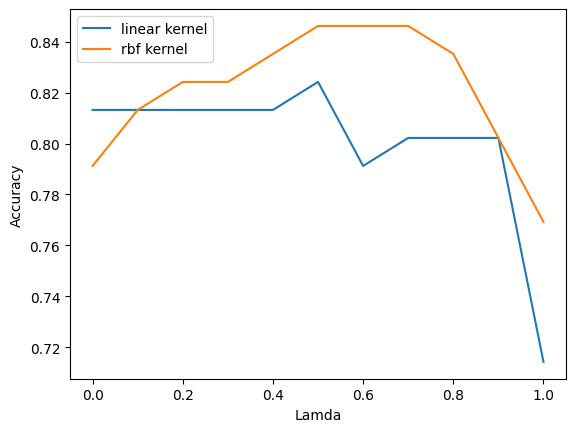

In [11]:
import matplotlib.pyplot as plt
plt.plot(lamda,accuracy,label="linear kernel")
plt.plot(lamda,accuracy_rbf, label="rbf kernel")
plt.xlabel("Lamda")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Answer:**

**Do we get advantage of the RBF based combination kernel versus the linear one?**

The model trained with an RBF kernel achieves higher accuracy for nearly all 𝜆 values. As mentioned before, there is a non-linear relationship between demographic variables and ECG parameters, making the Gaussian kernel a better choice for capturing these non-linearities in this type of problem.


**Why do you think the RBF kernel can now exploit no linear relationships?**

The feature space has been divided into two subsets (S1: demographic variables and ECG parameters, S2: channel parameters), so that now the Gaussian kernel can focus more on the nonlinearity between some features.

**Does the solution depend on  𝜆 ?**

This parameter represents the relevance of each subset in the predicted model. As can be seen in the figure above, the value of lambda obtains different accuracy, so this parameter must be cross-validated. When lambda is between 0.5 and 0.7, the model obtains the best results, which is equivalent to when the first subset is slightly more relevant.

**How can you really exploit the full potential of this approach?**

Combining linear and nonlinear kernels would exploit the potential of this approach. This is based on applying the best kernel (linear or Gaussian) that can exploit the linear or nonlinear relationships of each subset. For example, if the first subset has a nonlinear relationship, applying a Gaussian kernel would be the best choice, but perhaps for the second subset if a linear relationship exists, the linear kernel would be the more appropriate choice.

## Exercise 2.2 **Advanced** design of specific kernels (2.5 points)

To exploit the weaponry of sklearn in what respect to learning/cross-validate parameters for a classifier, **you have to design your own object `DualKernelSVM`** as a instantiation of the class estimator of sklearn.

Basically your `DualKernelSVM` object will have to encapsulate a  `sklearn.svm.SVC` with the option `'kernel'='precomputed'` and it will include the funcionalities to create the dual kernel (the linear combination of other two kernels). This means that instead of calling the fit, predict and score method of the inner svm with data matrices, we will call them with the corresponding dual kernel matrices.

Next cell includes a skeleton for this class that you can use as starting point. Once you complete it, use this class with the `GridSearchCV` function to desing a `dualSVM` and select by CV the optimal values of $\lambda$ and $C$.

*Note: From now, consider a RBF kernel. And despite you can also use this function to adjust the values of $\gamma_1$ and $\gamma_2$, to reduce the computational cost of the CV process, you can preset their values to $1/\#S_1$ and $1/\#S_2$ and reduce the number of parameters to be explored.*

In [12]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel

class DualKernelSVM(BaseEstimator, ClassifierMixin):
    def __init__(self, S1 = np.arange(15),
                 kernel1='RBF',
                 kernel2='RBF',
                 C = 1,
                 gamma1 = None,
                 gamma2 = None,
                 lamb = 0.5
                 ):
        self.S1 = S1
        self.kernel1 = kernel1
        self.kernel2 = kernel2
        self.C = C
        self.gamma1= gamma1
        self.gamma2 = gamma2
        self.lamb = lamb
        self.X_train1 = None
        self.X_train2 = None

    def fit(self, X, y):
        self.svm = SVC(C= self.C, kernel='precomputed')

        # Check that X and y have correct shape
        X, y = check_X_y(X, y)

        self.X_train1=X[:,0:15]
        self.X_train2=X[:, 15:279]

        # Store the classes seen during fit
        self.classes_ = unique_labels(y)

        if self.kernel1=='RBF':
          kernel1_matrix = rbf_kernel(self.X_train1)

        else:
          kernel1_matrix = linear_kernel(self.X_train1)

        if self.kernel2=='RBF':
          kernel2_matrix = rbf_kernel(self.X_train2)

        else:
          kernel2_matrix = linear_kernel(self.X_train2)

        kernel=self.lamb*kernel1_matrix+ (1 - self.lamb) * kernel2_matrix

        # Fit the SVM with the dual training kernel

        self.svm.fit(kernel, y)

        return self.svm

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)
        # Input validation
        X = check_array(X)

        self.X_test1=X[:,0:15]
        self.X_test2=X[:, 15:279]

        if self.kernel1=='RBF':
          kernel1_matrix = rbf_kernel(self.X_test1,self.X_train1)

        else:
          kernel1_matrix = linear_kernel(self.X_test1,self.X_train1)

        if self.kernel2=='RBF':
          kernel2_matrix = rbf_kernel(self.X_test2,self.X_train2)

        else:
          kernel2_matrix = linear_kernel(self.X_test2,self.X_train2)

        K_test_dual = self.lamb * kernel1_matrix + (1 - self.lamb) * kernel2_matrix

        # Compute predictions
        predictions = self.svm.predict(K_test_dual)

        return predictions

    def get_params(self, deep=True):
        return {
            "S1" : self.S1,
            "kernel1" : self.kernel1,
            "kernel2" : self.kernel2,
            "C": self.C,
            "gamma1" : self.gamma1,
            "gamma2" : self.gamma2,
            "lamb" : self.lamb}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def score(self, X, y):
        # Add here the code to define the test dual kernel and compute the model accuracy
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        self.X_test1=X[:,0:15]
        self.X_test2=X[:, 15:279]

        if self.kernel1=='RBF':
          kernel1_matrix = rbf_kernel(self.X_test1,self.X_train1)

        else:
          kernel1_matrix = linear_kernel(self.X_test1,self.X_train1)

        if self.kernel2=='RBF':
          kernel2_matrix = rbf_kernel(self.X_test2,self.X_train2)

        else:
          kernel2_matrix = linear_kernel(self.X_test2,self.X_train2)

        K_test_dual = self.lamb * kernel1_matrix + (1 - self.lamb) * kernel2_matrix

        score=self.svm.score(K_test_dual,y)

        return score

In [15]:
param_grid = {
    "lamb": np.arange(0,1.1,0.01),
    "C": np.logspace(-3, 3, 10)
}

# Kernel1= RBF Kernel2= RBF

print("-------Kernel1 = RBF, Kernel2= RBF------\n")
dual_svm = DualKernelSVM(kernel1='RBF', kernel2='RBF')
dual_svm.fit(X_train, Y_train)
predictions=dual_svm.predict(X_test)
accuracy=dual_svm.score(X_test,Y_test)
print("Accuracy using both RBF Kernel:", accuracy)

# Perform grid search
cv = GridSearchCV(dual_svm, param_grid, cv=5)
cv.fit(X_train, Y_train)
print("The Best C value :", cv.best_params_['C'])
print("The best lamb value: ",cv.best_params_['lamb'])
accuracy=cv.best_estimator_.score(X_test,Y_test)
print("Accuracy using both RBF Kernel and GridSearch: ", accuracy)

# Kernel1= Linear Kernel2= Linear

print("\n-------Kernel1 = Linear, Kernel2= Linear------\n")

dual_svm1 = DualKernelSVM(kernel1='linear',kernel2='linear')
dual_svm1.fit(X_train, Y_train)
predictions=dual_svm1.predict(X_test)
accuracy=dual_svm1.score(X_test,Y_test)
print("Accuracy using both linear Kernel:", accuracy)

# Perform grid search
cv1 = GridSearchCV(dual_svm1, param_grid, cv=5)
cv1.fit(X_train, Y_train)
print("The Best C value :", cv1.best_params_['C'])
print("The best lamb value: ",cv1.best_params_['lamb'])
accuracy=cv1.best_estimator_.score(X_test,Y_test)
print("Accuracy using both Linear Kernel and GridSearch: ", accuracy)

# Kernel1= RBF Kernel2= Linear

print("\n-------Kernel1 = RBF, Kernel2= Linear------\n")

dual_svm2 = DualKernelSVM(kernel1='RBF',kernel2='lineal')
dual_svm2.fit(X_train, Y_train)
predictions=dual_svm2.predict(X_test)
accuracy=dual_svm2.score(X_test,Y_test)
print("Accuracy using kernel1 = RBF and kernel2= lineal:", accuracy)

# Perform grid search
cv2 = GridSearchCV(dual_svm2, param_grid, cv=5)
cv2.fit(X_train, Y_train)
print("The Best C value :", cv2.best_params_['C'])
print("The best lamb value: ",cv2.best_params_['lamb'])
accuracy=cv2.best_estimator_.score(X_test,Y_test)
print("Accuracy using  kernel1 = RBF and kernel2= lineal and GridSearch: ", accuracy)

# Kernel1= Linear Kernel2= RBF

print("\n-------Kernel1 = Linear, Kernel2= RBF------\n")

dual_svm3 = DualKernelSVM(kernel1='Linear',kernel2='RBF')
dual_svm3.fit(X_train, Y_train)
predictions=dual_svm3.predict(X_test)
accuracy=dual_svm3.score(X_test,Y_test)
print("Accuracy using kernel1 = Linear and kernel2= RBF:", accuracy)

# Perform grid search
cv3 = GridSearchCV(dual_svm3, param_grid, cv=5)
cv3.fit(X_train, Y_train)
print("The Best C value :", cv3.best_params_['C'])
print("The best lamb value: ",cv3.best_params_['lamb'])
accuracy=cv3.best_estimator_.score(X_test,Y_test)
print("Accuracy using kernel1 = Linear and kernel2= RBF and GridSearch: ", accuracy)

-------Kernel1 = RBF, Kernel2= RBF------

Accuracy using both RBF Kernel: 0.8131868131868132
The Best C value : 2.154434690031882
The best lamb value:  0.29
Accuracy using both RBF Kernel and GridSearch:  0.8241758241758241

-------Kernel1 = Linear, Kernel2= Linear------

Accuracy using both linear Kernel: 0.7252747252747253
The Best C value : 0.004641588833612777
The best lamb value:  0.13
Accuracy using both Linear Kernel and GridSearch:  0.8131868131868132

-------Kernel1 = RBF, Kernel2= Linear------

Accuracy using kernel1 = RBF and kernel2= lineal: 0.8021978021978022
The Best C value : 0.1
The best lamb value:  0.9500000000000001
Accuracy using  kernel1 = RBF and kernel2= lineal and GridSearch:  0.8131868131868132

-------Kernel1 = Linear, Kernel2= RBF------

Accuracy using kernel1 = Linear and kernel2= RBF: 0.8241758241758241
The Best C value : 2.154434690031882
The best lamb value:  0.0
Accuracy using kernel1 = Linear and kernel2= RBF and GridSearch:  0.7912087912087912


**Answer:**

Taking advantage of the approach of combining linear and nonlinear kernels, the observed results show that the combination of a linear and Gaussian kernel for kernel1 and kernel2 respectively and using both Gaussian kernels obtain the best performance. These results show that when using both RBF kernels the relevance parameter (lambda) is for the second subset, which is the same approach as the linear and Gaussian combination. However, in the case of a combination of a Gaussian and linear kernel the relevance goes to the first subset.

*Note: I have not used the value of gamma because by default the rbf function use 1/number of features*